In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# p.260

In [2]:
U = np.random.rand(2,3) # 연결강도
W = np.random.rand(3,2) # 연결강도
learning_rate = 1.0 # 학습률

In [3]:
def sigmoid(v): # 순전파
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v): # sigmoid 미분, 역전파
    s = sigmoid(v)  # s가 y
    return s * (1 - s)

In [4]:
inputs = np.zeros(2)

h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
h_error, h_delta = np.zeros(3), np.zeros(3)

y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
y_error, y_delta = np.zeros(2), np.zeros(2)

In [5]:
def forward_xh(x): # x -> h
    global inputs, h_sum, h_out, h_deriv
    inputs = x
    h_sum = U.T.dot(inputs) # inputs.dot(U)
    h_out = sigmoid(h_sum)
    h_deriv = derivative_sigmoid(h_sum)

def forward_hy(): # h -> y
    global y_sum, y_out, y_deriv
    y_sum = W.T.dot(h_out)  # h_out.dot(W)
    y_out = sigmoid(y_sum)
    y_deriv = derivative_sigmoid(y_sum)

def compute_error(target):
    return y_out - target  # 예측치에서 target을 뺀 오차

In [6]:
def backward_y(error): # y -> h
    global y_error, y_delta, W
    y_error = error
    y_delta = y_error * y_deriv
    dW = -learning_rate * np.outer(h_out, y_delta) # 외적
    W += dW

def backward_h(): # h -> x
    global h_error, h_delta, U
    h_error = W.dot(y_delta)
    h_delta = h_error * h_deriv
    dU = -learning_rate * np.outer(inputs, h_delta) # 외적
    U += dU

def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2 # 모니터링용

In [7]:
U = np.random.rand(2,3) # 연결강도
W = np.random.rand(3,2) # 연결강도
learning_rate = 1 # 학습률

loss = []
for i in range(1000):
    e_accum = 0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)
    e_accum += train(np.array([0,1]), true)
    e_accum += train(np.array([1,1]), false)
    e_accum += train(np.array([1,0]), true) # e**2의 시그마 값 => L
    loss.append(e_accum)

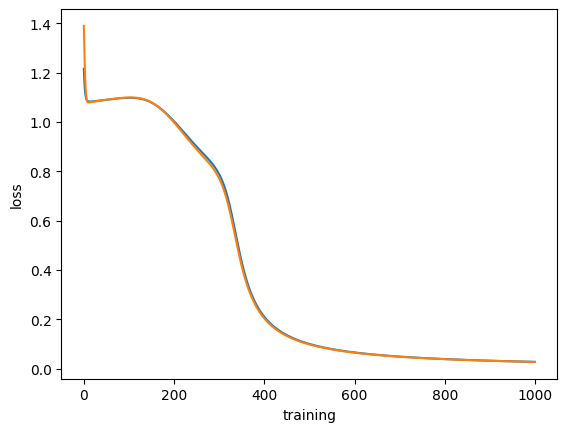

In [8]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [9]:
loss[-1]

array([0.02773196, 0.02750383])

In [10]:
def test(X):
    y_hat = [] # 예측값을 hat이라고 함
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

# 합해서 1 즉, 100%가 나오지는 않는다

In [11]:
test(np.array([[0,0],[0,1],[1,0],[1,1]]))

[array([0.12063282, 0.87981993]),
 array([0.92452098, 0.07516473]),
 array([0.92436478, 0.07531918]),
 array([0.03865928, 0.96160069])]

# 다층 퍼셉트론으로 비선형 회귀

* 예측하고자 하는 값이 하나
* 마지막 노드에는 활성화 함수 씌우면 안 됨 (linear unit 상태로 냅둬야 함)

### 딥러닝은 똑같은 모델로도 출력 노드만 바꾸면 분류, 회귀 등 상황에 따라 만들 수 있다

# 딥러닝 모델만 잘 만들면 여기저기 잘 쓸 수 있다